# Pandas Series

In [1]:
import pandas as pd
songs2=pd.Series([145, 142, 38, 13], name='counts')
songs2

0    145
1    142
2     38
3     13
Name: counts, dtype: int64

In [2]:
#index of the series
songs2.index

RangeIndex(start=0, stop=4, step=1)

The index can be string in which case pandas indicates that the datatype for the index is object

In [3]:
songs3=pd.Series([145, 142, 38, 13], name='counts', index=['Paul', 'John', 'George', 'Ringo'])
songs3

Paul      145
John      142
George     38
Ringo      13
Name: counts, dtype: int64

In [4]:
songs3.index

Index(['Paul', 'John', 'George', 'Ringo'], dtype='object')

We can insert python object into a series

In [5]:
class Foo:
    x=5
ringo=pd.Series(['Richard', 'Starkey', 13, Foo()], name='ringo')
ringo

0                                    Richard
1                                    Starkey
2                                         13
3    <__main__.Foo object at 0x7f05e440a828>
Name: ringo, dtype: object

In [6]:
#nan value
nan_ser=pd.Series([2, None], index=['Ono', 'Clapton'])
nan_ser

Ono        2.0
Clapton    NaN
dtype: float64

In [7]:
#count func ignores nan value
nan_ser.count()

1

The series object behaves similarly to a numpy array

In [8]:
import numpy as np
numpy_ser=np.array([145, 142, 38, 13])
#index
print(songs3[1])
print(numpy_ser[1])
#mean
print(songs3.mean())
print(numpy_ser.mean())

142
142
84.5
84.5


In [9]:
#boolean mask
mask=songs3>songs3.median()
mask

Paul       True
John       True
George    False
Ringo     False
Name: counts, dtype: bool

In [10]:
songs3[mask]

Paul    145
John    142
Name: counts, dtype: int64

# Series CRUD

Creation

In [11]:
george_dupe=pd.Series([10, 7, 1, 22], index=['1968', '1969', '1970', '1970'], name='George Songs')
george_dupe

1968    10
1969     7
1970     1
1970    22
Name: George Songs, dtype: int64

In [12]:
#a series can also be created with a dictionary that maps index entris to values
g2=pd.Series({'1969': 7, '1970': [1,22]}, index=['1969', '1970', '1970'])
g2

1969          7
1970    [1, 22]
1970    [1, 22]
dtype: object

In [13]:
george_dupe['1968']

10

In [14]:
george_dupe['1970']

1970     1
1970    22
Name: George Songs, dtype: int64

In [15]:
#we can iterate over data in a series
for item in george_dupe:
    print(item)

10
7
1
22


In [16]:
#the test a series for membership test against the set of the series or the .value attribute
22 in set(george_dupe)

True

In [17]:
22 in george_dupe.values

True

In [18]:
#the membership is over the index names
'1970' in george_dupe

True

In [19]:
#to iterate over the tuples containing both the index label and the value use the .iteritems method
for item in george_dupe.iteritems():
    print(item)

('1968', 10)
('1969', 7)
('1970', 1)
('1970', 22)


In [20]:
george_dupe['1969']=6
george_dupe['1969']

6

In [21]:
george_dupe['1973']=11
george_dupe

1968    10
1969     6
1970     1
1970    22
1973    11
Name: George Songs, dtype: int64

In [22]:
#what happens when we try to update an index that has duplicate entries both values for 1970 were set to 2 
#if u had data such as this it would probably be better to use a data frame with a column for artist
george_dupe['1970']=2
george_dupe

1968    10
1969     6
1970     2
1970     2
1973    11
Name: George Songs, dtype: int64

In [23]:
george_dupe.iloc[3]=22
george_dupe

1968    10
1969     6
1970     2
1970    22
1973    11
Name: George Songs, dtype: int64

In [24]:
#append func
george_dupe.append(pd.Series({'1974':9}))

1968    10
1969     6
1970     2
1970    22
1973    11
1974     9
dtype: int64

In [26]:
#set_value func
#george_dupe.set_value('1974', 9)

Deletion

In [27]:
del george_dupe['1973']
george_dupe

1968    10
1969     6
1970     2
1970    22
Name: George Songs, dtype: int64

In [28]:
george_dupe[george_dupe<=2]

1970    2
Name: George Songs, dtype: int64

# Series Indexing

In [29]:
george=pd.Series([10, 7], index=['1968', '1969'], name='George Songs')
george

1968    10
1969     7
Name: George Songs, dtype: int64

In [30]:
george.index

Index(['1968', '1969'], dtype='object')

In [31]:
dupe=pd.Series([10, 2, 7], index=['1968', '1968', '1969'], name='George Songs')

is_unique func - To determine whether an index has duplicates

In [32]:
dupe.index.is_unique

False

In [33]:
george.index.is_unique

True

# Boolean Arrays

In [34]:
mask=george>7

In [35]:
mask

1968     True
1969    False
Name: George Songs, dtype: bool

In [36]:
george[mask]

1968    10
Name: George Songs, dtype: int64

In [37]:
mask2=george<=2
george[mask | mask2]

1968    10
Name: George Songs, dtype: int64

# Series Methods

In [38]:
songs_66=pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')

Iteration

In [39]:
for value in songs_66:
    print(value)

3.0
nan
11.0
9.0


In [40]:
#.iteritems method to loop over the index, value pairs
for idx, value in songs_66.iteritems():
    print(idx, value)

George 3.0
Ringo nan
John 11.0
Paul 9.0


In [41]:
for idx in songs_66.keys():
    print(idx)

George
Ringo
John
Paul


# Overloaded Operations

In [42]:
songs_66+2

George     5.0
Ringo      NaN
John      13.0
Paul      11.0
Name: Counts, dtype: float64

In [43]:
songs_69=pd.Series([18, 22, 7, 5], index=['John', 'Paul', 'George', 'Ringo'], name='Counts')

In [44]:
#addition with two series objetcs adds only those items whose index occurs in both series
songs_66+songs_69

George    10.0
John      29.0
Paul      31.0
Ringo      NaN
Name: Counts, dtype: float64

In [45]:
#fillna method to replace nan with zero
songs_66.fillna(0)+songs_69.fillna(0)

George    10.0
John      29.0
Paul      31.0
Ringo      5.0
Name: Counts, dtype: float64

In [46]:
songs_66-songs_69

George    -4.0
John      -7.0
Paul     -13.0
Ringo      NaN
Name: Counts, dtype: float64

In [47]:
songs_66*songs_69

George     21.0
John      198.0
Paul      198.0
Ringo       NaN
Name: Counts, dtype: float64

# Getting and Setting values

In [48]:
songs_66

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [49]:
songs_66['John']

11.0

In [50]:
#songs_66.get_value('John')

In [51]:
songs_66.John

11.0

In [52]:
#.get provides an optional parameter to return should the lookup fail
songs_66.get('Fred', 'missing')

'missing'

In [53]:
#.get_value method raises an exception if the index value is missing
#songs_66.get_value('Fred')

In [54]:
songs_66.set_value('John', 80)
songs_66['John']

AttributeError: 'Series' object has no attribute 'set_value'

# Reset Index

In [55]:
songs_66.reset_index()

,index,Counts
0,George,3.0
1,Ringo,NaN
2,John,11.0
3,Paul,9.0


In [56]:
songs_66.reset_index(drop=True)

0     3.0
1     NaN
2    11.0
3     9.0
Name: Counts, dtype: float64

In [57]:
songs_66.reindex(['Billy', 'Eric', 'George', 'Yoko'])

Billy     NaN
Eric      NaN
George    3.0
Yoko      NaN
Name: Counts, dtype: float64

In [58]:
songs_66.rename({'Ringo':'Richard'})

George      3.0
Richard     NaN
John       11.0
Paul        9.0
Name: Counts, dtype: float64

In [59]:
songs_66.rename(lambda x: x.lower())

george     3.0
ringo      NaN
john      11.0
paul       9.0
Name: Counts, dtype: float64

In [60]:
idx=songs_66.index
idx

Index(['George', 'Ringo', 'John', 'Paul'], dtype='object')

In [61]:
idx2=range(len(idx))
list(idx2)

[0, 1, 2, 3]

In [62]:
songs_66.index=idx2
songs_66

0     3.0
1     NaN
2    11.0
3     9.0
Name: Counts, dtype: float64

In [63]:
songs_66.index

RangeIndex(start=0, stop=4, step=1)

# Counts

In [64]:
songs_66=pd.Series([3, None, 11, 9], index=['George', 'Ringo', 'John', 'Paul'], name='Counts')
songs_66

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [65]:
scores2=pd.Series([67.3, 100, 96.7, None, 100], index=['Ringo', 'Paul', 'George', 'Peter', 'Billy'], name='test2')
scores2

Ringo      67.3
Paul      100.0
George     96.7
Peter       NaN
Billy     100.0
Name: test2, dtype: float64

In [66]:
#.count method returns the number of non-null items
scores2.count()

4

In [67]:
#.value_counts returns a mapping of values to their counts, ordered by frequency
scores2.value_counts()

100.0    2
96.7     1
67.3     1
Name: test2, dtype: int64

In [68]:
#.unique method includes the nan value
scores2.unique()

array([ 67.3, 100. ,  96.7,   nan])

In [69]:
#.nunique does not count nan value
scores2.nunique()

3

In [70]:
#.drop_duplicates is use to drop the duplicate values
scores2.drop_duplicates()

Ringo      67.3
Paul      100.0
George     96.7
Peter       NaN
Name: test2, dtype: float64

In [71]:
#.duplicated method is use to retrieve a series with boolea values indicating whether its value was repeated
scores2.duplicated()

Ringo     False
Paul      False
George    False
Peter     False
Billy      True
Name: test2, dtype: bool

In [72]:
scores3=pd.Series([67.3, 100, 96.7, None, 100, 79], index=['Ringo', 'Paul', 'George', 'Peter', 'Billy', 'Paul'])

In [73]:
scores3.groupby(scores3.index).first()

Billy     100.0
George     96.7
Paul      100.0
Peter       NaN
Ringo      67.3
dtype: float64

In [74]:
scores3.groupby(scores3.index).last()

Billy     100.0
George     96.7
Paul       79.0
Peter       NaN
Ringo      67.3
dtype: float64

# Statistics

In [75]:
songs_66.sum()

23.0

In [76]:
songs_66.sum(skipna=False)

nan

In [77]:
songs_66.mean()

7.666666666666667

In [78]:
songs_66.median()

9.0

In [79]:
songs_66.quantile()

9.0

In [80]:
songs_66.quantile(.1)

4.2

In [81]:
songs_66.quantile(.9)

10.6

In [82]:
#.describe method presents a good numbe of summary statistics and returns the result as a series
songs_66.describe()

count     3.000000
mean      7.666667
std       4.163332
min       3.000000
25%       6.000000
50%       9.000000
75%      10.000000
max      11.000000
Name: Counts, dtype: float64

In [83]:
songs_66.describe(percentiles=[.05, .1, .2])

count     3.000000
mean      7.666667
std       4.163332
min       3.000000
5%        3.600000
10%       4.200000
20%       5.400000
50%       9.000000
max      11.000000
Name: Counts, dtype: float64

In [84]:
print(songs_66.min())
print(songs_66.max())

3.0
11.0


In [85]:
#.idxmin and .idxmax methods are use to get the index location of min and max values
print(songs_66.idxmin())
print(songs_66.idxmax())

George
John


In [86]:
songs_66.var()

17.333333333333336

In [87]:
songs_66.std()

4.163331998932266

In [88]:
#mean absolute deviation is calculated by averaging the absolute values of the difference between the mean and the values
songs_66.mad()

3.1111111111111107

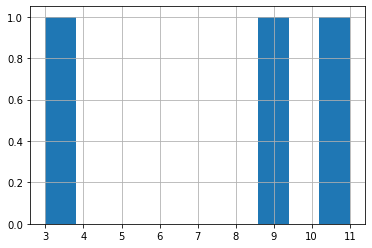

In [89]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_subplot(111)
songs_66.hist(ax=ax)
fig.savefig('./song-hist.png')

In [90]:
songs_66.skew()

-1.293342780733397

In [91]:
#.kurt method returns nan if there are fewer than four members
songs_66.kurt()

nan

In [92]:
#covariance is a measure of how two variables change together
songs_66.cov(songs_69)

28.333333333333332

In [93]:
#the more positive this value is the greater the correlation the more negative it is the greater the inverse correlation.
#a value of zero correlation indicates no correlation
songs_66.corr(songs_69)

0.8761489936497804

In [94]:
#the autocorrelation measure describes the correlation of aseries with itself shifted one position
songs_66.autocorr()

/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/srv/conda/envs/notebook/lib/python3.6/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


nan

In [95]:
songs_66.dropna().autocorr()

-0.9999999999999999

In [96]:
songs_66.diff()

George    NaN
Ringo     NaN
John      NaN
Paul     -2.0
Name: Counts, dtype: float64

In [97]:
songs_66.cumsum()

George     3.0
Ringo      NaN
John      14.0
Paul      23.0
Name: Counts, dtype: float64

In [98]:
songs_66.cumprod()

George      3.0
Ringo       NaN
John       33.0
Paul      297.0
Name: Counts, dtype: float64

In [99]:
songs_66.cummin()

George    3.0
Ringo     NaN
John      3.0
Paul      3.0
Name: Counts, dtype: float64

# Convert Types

In [100]:
songs_66.round()

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [101]:
songs_66.clip(lower=80, upper=90)

George    80.0
Ringo      NaN
John      80.0
Paul      80.0
Name: Counts, dtype: float64

In [102]:
songs_66.astype(str)

George     3.0
Ringo      nan
John      11.0
Paul       9.0
Name: Counts, dtype: object

In [103]:
songs_66.astype(str).max()

'nan'

Dealing with none

In [104]:
#.notnull method gives us a boolean array of non nan values
val_mask=songs_66.notnull()
val_mask

George     True
Ringo     False
John       True
Paul       True
Name: Counts, dtype: bool

In [105]:
songs_66[val_mask]

George     3.0
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [106]:
#.isnull method returns the null positions
nan_mask=songs_66.isnull()
nan_mask

George    False
Ringo      True
John      False
Paul      False
Name: Counts, dtype: bool

In [107]:
songs_66[nan_mask]

Ringo   NaN
Name: Counts, dtype: float64

In [108]:
~nan_mask

George     True
Ringo     False
John       True
Paul       True
Name: Counts, dtype: bool

In [109]:
#first_valid_index and last_valid_index returns the first and last valid index
print(songs_66.first_valid_index())
print(songs_66.last_valid_index())

George
Paul


# Matrix Operations

In [110]:
#.dot method does not work for nan value
songs_66.dot(songs_69)

nan

In [111]:
songs_66.dropna().dot(songs_66.dropna())

211.0

In [112]:
songs_66.T

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

In [113]:
songs_66.transpose()

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
Name: Counts, dtype: float64

Append

In [114]:
songs_66.append(songs_69)

George     3.0
Ringo      NaN
John      11.0
Paul       9.0
John      18.0
Paul      22.0
George     7.0
Ringo      5.0
Name: Counts, dtype: float64

In [115]:
#.append method has a parameter named verify_integrity which when set to true to complain if index values are duplicated
#songs_66.append(songs_69, verify_integrity=True)

In [116]:
#.combine is use to perform the element wise operations on series
def avg(v1, v2):
    return (v1+v2)/2.0
songs_66.combine(songs_69, avg)

George     5.0
John      14.5
Paul      15.5
Ringo      NaN
Name: Counts, dtype: float64

In [117]:
#update method is use to update values from one series
songs_66.update(songs_69)

In [118]:
songs_66

George     7.0
Ringo      5.0
John      18.0
Paul      22.0
Name: Counts, dtype: float64

In [119]:
#repeat method simply repeat every item
songs_69.repeat(2)

John      18
John      18
Paul      22
Paul      22
George     7
George     7
Ringo      5
Ringo      5
Name: Counts, dtype: int64

# Sorting

In [120]:
songs_66.sort_values()

Ringo      5.0
George     7.0
John      18.0
Paul      22.0
Name: Counts, dtype: float64

In [121]:
songs_66.sort_values(ascending=False)

Paul      22.0
John      18.0
George     7.0
Ringo      5.0
Name: Counts, dtype: float64

In [122]:
songs_66.sort_index()

George     7.0
John      18.0
Paul      22.0
Ringo      5.0
Name: Counts, dtype: float64

In [123]:
songs_66.sort_index(ascending=False)

Ringo      5.0
Paul      22.0
John      18.0
George     7.0
Name: Counts, dtype: float64

In [124]:
songs_66.rank()

George    2.0
Ringo     1.0
John      3.0
Paul      4.0
Name: Counts, dtype: float64

Applying a function

In [125]:
#the map method applies a function to every item in the series
def format(x):
    if x==1:
        template='{} song'
    else:
        template='{} songs'
    return template.format(x)
songs_66.map(format)

George     7.0 songs
Ringo      5.0 songs
John      18.0 songs
Paul      22.0 songs
Name: Counts, dtype: object

In [126]:
songs_66.map({5:None, 18:21, 22:23})

George     NaN
Ringo      NaN
John      21.0
Paul      23.0
Name: Counts, dtype: float64

In [127]:
mapping=pd.Series({22:33})
mapping

22    33
dtype: int64

In [128]:
songs_66.map(mapping)

George     NaN
Ringo      NaN
John       NaN
Paul      33.0
Name: Counts, dtype: float64

Serialization

In [129]:
#to save a series as a CSV file simply pass a file object to the .to_csv method
from io import StringIO
fout=StringIO()
songs_66.to_csv(fout)
print(fout.getvalue())

,Counts
George,7.0
Ringo,5.0
John,18.0
Paul,22.0



In [130]:
fout=StringIO()
songs_66.to_csv(fout, header=True)
print(fout.getvalue())

,Counts
George,7.0
Ringo,5.0
John,18.0
Paul,22.0



In [131]:
fout=StringIO()
songs_66.to_csv(fout, header=True, index_label='Name')
print(fout.getvalue())

Name,Counts
George,7.0
Ringo,5.0
John,18.0
Paul,22.0



In [132]:
#to create a series from  a CSV file using the .from_csv method
fout.seek(0)
series=pd.read_csv(fout)
series

,Name,Counts
0,George,7.0
1,Ringo,5.0
2,John,18.0
3,Paul,22.0


String Operations

In [133]:
names=pd.Series(['George', 'John', 'Paul'])
names.str.lower()

0    george
1      john
2      paul
dtype: object

In [134]:
names.str.findall('o')

0    [o]
1    [o]
2     []
dtype: object

In [135]:
def lower(val):
    return val.lower()
names.apply(lower)

0    george
1      john
2      paul
dtype: object

# Series Plotting

In [136]:
songs_69.name='Counts 69'
songs_69

John      18
Paul      22
George     7
Ringo      5
Name: Counts 69, dtype: int64

In [137]:
songs_66.name='Counts 66'
songs_66['Eric']=float('nan')
songs_66

George     7.0
Ringo      5.0
John      18.0
Paul      22.0
Eric       NaN
Name: Counts 66, dtype: float64

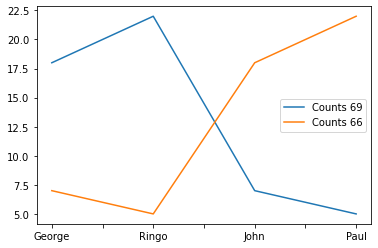

In [138]:
#plotting two series that have string indexes the default plot type is a line plot
import matplotlib.pyplot as plt
fig=plt.figure()
songs_69.plot()
songs_66.plot()
plt.legend()
fig.savefig('./ex1.png')

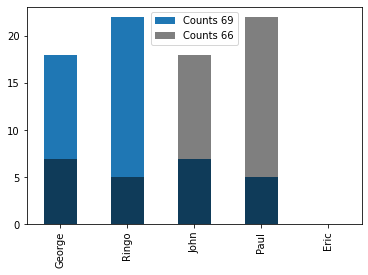

In [139]:
#it can also create bar charts by changing the kind parameter
fig=plt.figure()
songs_69.plot(kind='bar')
songs_66.plot(kind='bar', color='k', alpha=.5)
plt.legend()
fig.savefig('./ex2.png')

In [140]:
data=pd.Series(np.random.randn(500), name='500 random')

In pandas the histogram can be created using .hist method

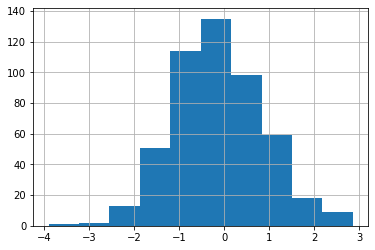

In [141]:
fig=plt.figure()
ax=fig.add_subplot(111)
data.hist()
fig.savefig('./ex3.png')

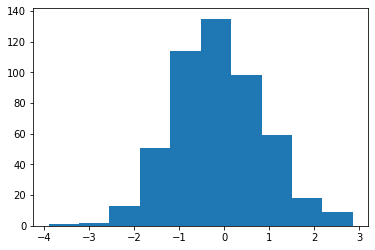

In [142]:
#matplotlib histogram
fig=plt.figure()
ax=fig.add_subplot(111)
ax.hist(data)
fig.savefig('./ex3-1.png')

In [ ]:
#we can plot a kernel destination estimation plot
#this plot is very similar to a histogram but rather than using bins to represent areas where numbers fall it plot a curved line
fig=plt.figure()
data.plot(kind='kde')
fig.savefig('./ex4.png')

AttributeError: 'Rectangle' object has no property 'normed'

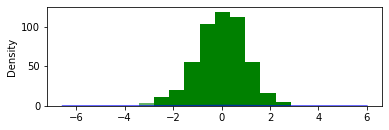

In [130]:
fig=plt.figure()
ax=fig.add_subplot(211)
data.plot(kind='kde', color='b', alpha=.6, ax=ax)
data.hist(color='g', alpha=.6, ax=ax, normed=True)
ax.set_title("KDE, Histogram & CDF")
ax=fig.add_subplot(212)
data.hist(ax=ax, normed=True, cumulative=True)
fig.savefig('./ex5.png')